In [ ]:
import tensorflow 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPooling2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import matplotlib.pyplot as plt

%matplotlib inline 

In [ ]:
train_data_path = "/work/Soil_Dataset/Train"
validation_data_path = "/work/Soil_Dataset/Test/"

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# This is the augmentation configuration we will use for training
# It generates more images from the existing dataset
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode='nearest')
 

In [ ]:
# this is a generator that will read pictures found in
# the train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels
 

Found 715 images belonging to 4 classes.


In [ ]:
training_data.class_indices
 

{'Alluvial_Soil': 0, 'Black_Soil': 1, 'Clay_Soil': 2, 'Red_Soil': 3}

In [ ]:
# this is the configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 

In [ ]:
# this is a similar to the generator, but for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')
 

Found 188 images belonging to 4 classes.


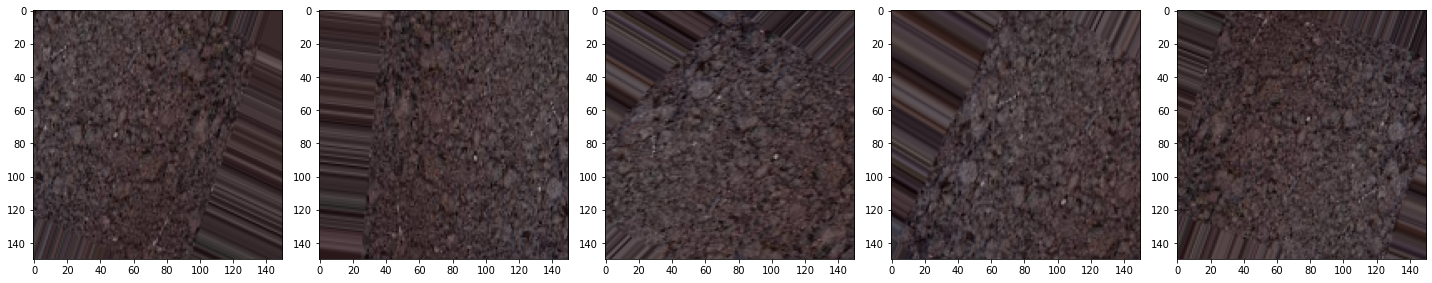

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)
 

In [ ]:
model_path = '/work/Soil_Dataset/model_v1.h5'
# earlystopping = EarlyStopping(monitor = 'val_accuracy', 
#                               mode = 'max' , 
#                               patience = 51)

# checkpoint    = ModelCheckpoint(model_path, 
#                                 monitor = 'val_accuracy', 
#                                 mode='max', 
#                                 save_best_only=True, 
#                                 verbose = 1)

# learning_rate = ReduceLROnPlateau(monitor = 'val_accuracy',
#                                   mode = 'max',
#                                   verbose = 1,
#                                   factor = 0.1,
#                                   min_delta = 1e-5,
#                                   patience = 17)
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
# callback_list = [earlystopping, checkpoint, learning_rate]


In [ ]:
#Building the cnn model
cnn_model = tensorflow.keras.models.Sequential([
                                    Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    MaxPooling2D(pool_size=(2,2)),
                                    Conv2D(filters=64, kernel_size=3),
                                    MaxPooling2D(pool_size=(2,2)),
                                    Conv2D(filters=128, kernel_size=3),
                                    MaxPooling2D(pool_size=(2,2)),                                    
                                    Conv2D(filters=256, kernel_size=3),
                                    MaxPooling2D(pool_size=(2,2)),
 
                                    Dropout(0.5),                                                                        
                                    Flatten(), # neural network beulding
                                    Dense(units=128, activation='relu'), # input layers
                                    Dropout(0.1),                                    
                                    Dense(units=256, activation='relu'),                                    
                                    Dropout(0.25),                                    
                                    Dense(units=4, activation='softmax') # output layer
])
 

In [ ]:
# compiling the cnn model
cnn_model.compile(optimizer = Adam(lr=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# training the cnn model
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callback_list)


Epoch 00067: val_accuracy did not improve from 0.88830
Epoch 68/500
23/23 [==============================] - 42s 2s/step - loss: 0.3304 - accuracy: 0.8789 - val_loss: 0.3292 - val_accuracy: 0.8670

Epoch 00068: val_accuracy did not improve from 0.88830
Epoch 69/500
23/23 [==============================] - 38s 2s/step - loss: 0.2938 - accuracy: 0.8704 - val_loss: 0.3281 - val_accuracy: 0.8777

Epoch 00069: val_accuracy did not improve from 0.88830
Epoch 70/500
23/23 [==============================] - 38s 2s/step - loss: 0.2863 - accuracy: 0.8912 - val_loss: 0.3184 - val_accuracy: 0.8723

Epoch 00070: val_accuracy did not improve from 0.88830
Epoch 71/500
23/23 [==============================] - 38s 2s/step - loss: 0.3253 - accuracy: 0.8663 - val_loss: 0.3305 - val_accuracy: 0.8723

Epoch 00071: val_accuracy did not improve from 0.88830
Epoch 72/500
23/23 [==============================] - 38s 2s/step - loss: 0.2273 - accuracy: 0.9146 - val_loss: 0.3153 - val_accuracy: 0.8777

Epoch 000

23/23 [==============================] - 38s 2s/step - loss: 0.1257 - accuracy: 0.9618 - val_loss: 0.2825 - val_accuracy: 0.9043

Epoch 00317: val_accuracy did not improve from 0.91489
Epoch 318/500
23/23 [==============================] - 38s 2s/step - loss: 0.1709 - accuracy: 0.9345 - val_loss: 0.2626 - val_accuracy: 0.9043

Epoch 00318: val_accuracy did not improve from 0.91489
Epoch 319/500
23/23 [==============================] - 37s 2s/step - loss: 0.1069 - accuracy: 0.9601 - val_loss: 0.2822 - val_accuracy: 0.8989

Epoch 00319: val_accuracy did not improve from 0.91489
Epoch 320/500
23/23 [==============================] - 38s 2s/step - loss: 0.1369 - accuracy: 0.9422 - val_loss: 0.2743 - val_accuracy: 0.9043

Epoch 00320: val_accuracy did not improve from 0.91489
Epoch 321/500
23/23 [==============================] - 38s 2s/step - loss: 0.1429 - accuracy: 0.9545 - val_loss: 0.2689 - val_accuracy: 0.9149

Epoch 00321: val_accuracy did not improve from 0.91489
Epoch 322/500
23/23

23/23 [==============================] - 38s 2s/step - loss: 0.0960 - accuracy: 0.9627 - val_loss: 0.2525 - val_accuracy: 0.9149

Epoch 00451: val_accuracy did not improve from 0.92021
Epoch 452/500
23/23 [==============================] - 38s 2s/step - loss: 0.1141 - accuracy: 0.9580 - val_loss: 0.2612 - val_accuracy: 0.9255

Epoch 00452: val_accuracy improved from 0.92021 to 0.92553, saving model to /work/Soil_Dataset/model_v1.h5
Epoch 453/500
23/23 [==============================] - 38s 2s/step - loss: 0.1306 - accuracy: 0.9534 - val_loss: 0.2553 - val_accuracy: 0.9202

Epoch 00453: val_accuracy did not improve from 0.92553
Epoch 454/500
23/23 [==============================] - 38s 2s/step - loss: 0.0977 - accuracy: 0.9704 - val_loss: 0.2349 - val_accuracy: 0.9149

Epoch 00454: val_accuracy did not improve from 0.92553
Epoch 455/500
23/23 [==============================] - 38s 2s/step - loss: 0.1133 - accuracy: 0.9652 - val_loss: 0.2432 - val_accuracy: 0.9149

Epoch 00455: val_accur

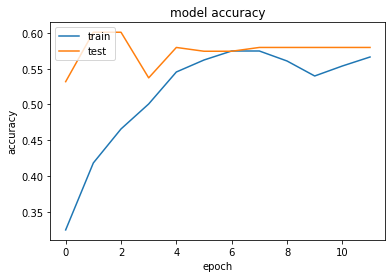

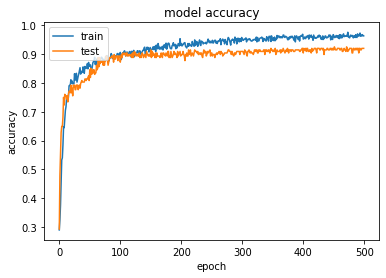

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

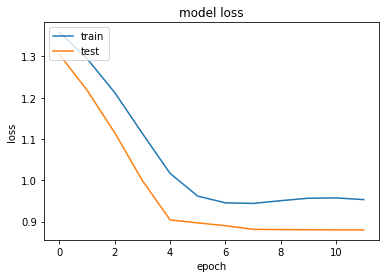

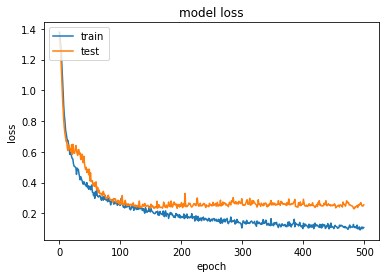

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
classes = {0:"Alluvial",1:"Black",2:"Clay",3:"Red"}

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

ModuleNotFoundError: No module named 'cv2'

In [ ]:
model = load_model('/work/Soil_Dataset/model_v1.h5')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
img = cv2.imread('/work/image.jpg')
img = cv2.resize(img,(150,150))
test_image = img_to_array(img)/255 # convert image to np array and normalize
test_image = np.expand_dims(img, axis = 0) # change dimention 3D to 4D

NameError: name 'cv2' is not defined

In [ ]:
result = model.predict_classes(test_image)

NameError: name 'test_image' is not defined

In [ ]:
print('@@ Raw result = ', result)

NameError: name 'result' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=83091aae-e514-4ec1-9655-53608577e891' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>